# Journal of Stylometry of Byzantine Ivory Boxes
### Author: Sage Ren, Diliana Angelova
### Date: 2022-Feb-18th
### Used Dataset: Cluny, Louvre Box, Veroli Box

## 1. Importing Prerequisites, Data Cleaning, and Augmentation

In [1]:
!pip install -U albumentations

In [2]:
#prerequisites
from fastai.vision.all import *
from fastai.data.external import *
from PIL import Image
import glob
import albumentations as A
import numpy as np 

In [3]:
p = "dataset"
veroli = "Veroli Box"
louvre = "Louvre Box"
cluny = "Cluny"
v = "dataset/veroli/"
l = "dataset/louvre/"
c = "dataset/cluny/"
SIZE = 480
batch_size = 6

In [4]:
# Image Augmentation Functions
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.HueSaturationValue(),
])

In [5]:
# Testing out a image with method resize

# saving data into Veroli List
veroli_list = []
for filename in glob.glob(veroli+"/*.JPG"):
    img = Image.open(filename)
    resized = img.resize((SIZE,SIZE))
    resized = np.array(resized)
    transformed_1 = transform(image=resized)['image']
    transformed_2 = transform(image=resized)['image']
    transformed_3 = transform(image=resized)['image']
    veroli_list.append(resized)
    veroli_list.append(transformed_1)
    veroli_list.append(transformed_2)
    veroli_list.append(transformed_3)

# saving data into Louvre List
louvre_list = []
for filename in glob.glob(louvre+"/*.JPG"):
    img = Image.open(filename)
    resized = img.resize((SIZE,SIZE))
    resized = np.array(resized)
    transformed_1 = transform(image=resized)['image']
    transformed_2 = transform(image=resized)['image']
    transformed_3 = transform(image=resized)['image']
    louvre_list.append(resized)
    louvre_list.append(transformed_1)
    louvre_list.append(transformed_2)
    louvre_list.append(transformed_3)

# saving data into Cluny list
cluny_list = []
for filename in glob.glob(cluny+"/*.JPG"):
    img = Image.open(filename)
    resized = img.resize((SIZE,SIZE))
    resized = np.array(resized)
    transformed_1 = transform(image=resized)['image']
    transformed_2 = transform(image=resized)['image']
    transformed_3 = transform(image=resized)['image']
    cluny_list.append(resized)
    cluny_list.append(transformed_1)
    cluny_list.append(transformed_2)
    cluny_list.append(transformed_3)

len(veroli_list), len(louvre_list), len(cluny_list)

KeyboardInterrupt: 

In [ ]:
cluny_list[-2]

array([[[125, 106,  73],
        [133, 112,  73],
        [135, 114,  75],
        ...,
        [ 57,  50,  37],
        [ 50,  46,  32],
        [ 52,  44,  28]],

       [[125, 104,  72],
        [132, 109,  77],
        [139, 114,  78],
        ...,
        [ 96,  86,  75],
        [ 88,  81,  69],
        [ 85,  79,  67]],

       [[128, 108,  77],
        [134, 116,  83],
        [139, 119,  83],
        ...,
        [116, 113,  95],
        [117, 108,  93],
        [113, 105,  88]],

       ...,

       [[107,  94,  65],
        [103,  89,  58],
        [ 74,  57,  30],
        ...,
        [ 82,  72,  58],
        [ 81,  74,  56],
        [ 86,  76,  57]],

       [[105,  91,  61],
        [ 91,  72,  43],
        [ 55,  36,  17],
        ...,
        [ 86,  77,  60],
        [ 85,  75,  58],
        [ 91,  77,  59]],

       [[100,  83,  50],
        [ 68,  48,  25],
        [ 50,  31,  13],
        ...,
        [ 88,  77,  59],
        [ 87,  74,  57],
        [ 91,  76,  63]]

In [ ]:
# saving images into dataset folders
i = 0
for x in veroli_list:
    im = Image.fromarray(x)
    im.save(v+str(i)+".png")
    i += 1

i = 0
for x in louvre_list:
    im = Image.fromarray(x)
    im.save(l+str(i)+".png")
    i += 1
    
i = 0
for x in cluny_list:
    im = Image.fromarray(x)
    im.save(c+str(i)+".png")
    i += 1

## 2. Stylometry

In [44]:
dls = ImageDataLoaders.from_folder(p, valid_pct=0.2, bs = batch_size)
dls.valid_ds.items[:10]

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


[Path('dataset/louvre/73.png'),
 Path('dataset/veroli/1213.png'),
 Path('dataset/veroli/193.png'),
 Path('dataset/louvre/299.png'),
 Path('dataset/veroli/911.png'),
 Path('dataset/veroli/1056.png'),
 Path('dataset/veroli/694.png'),
 Path('dataset/louvre/321.png'),
 Path('dataset/veroli/1224.png'),
 Path('dataset/veroli/1287.png')]

In [45]:
dls.train_ds.items[:10]

[Path('dataset/veroli/1087.png'),
 Path('dataset/veroli/302.png'),
 Path('dataset/veroli/37.png'),
 Path('dataset/louvre/401.png'),
 Path('dataset/veroli/1065.png'),
 Path('dataset/veroli/101.png'),
 Path('dataset/veroli/1365.png'),
 Path('dataset/veroli/431.png'),
 Path('dataset/veroli/650.png'),
 Path('dataset/veroli/1353.png')]

In [46]:
len(dls.train_ds.items)

1626

In [47]:
len(dls.valid_ds.items)

406

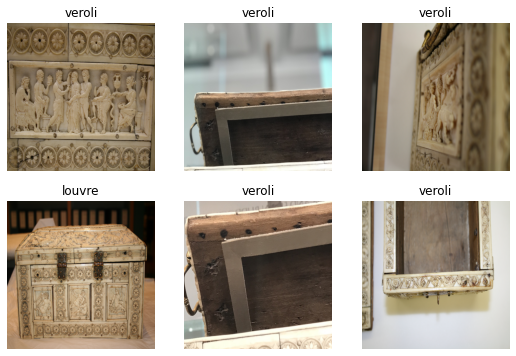

In [48]:
dls.show_batch()


In [49]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [50]:
# at this point, we probabaly need to clear out memory
import torch 
torch.cuda.empty_cache()

import gc
gc.collect()

27319

In [51]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3080'

In [52]:
torch.cuda.memory_allocated(0)

147570176

SuggestedLRs(valley=0.0030199517495930195)

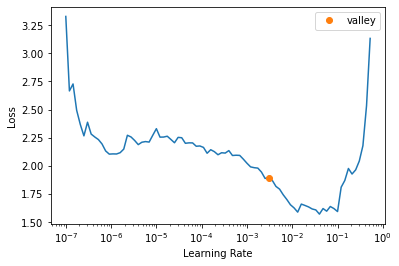

In [53]:
# at this point, we probabaly need to clear out memory
import torch 
torch.cuda.empty_cache()

import gc
gc.collect()

learn.lr_find()

In [54]:
learn.fine_tune(4,3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.298809,0.004719,0.000000,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.360149,0.037785,0.004926,00:37
1,0.158707,0.009759,0.002463,00:36
2,0.067731,0.001988,0.000000,00:36
3,0.036575,0.000278,0.000000,00:36


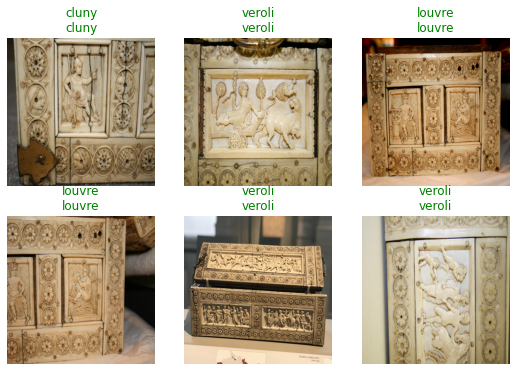

In [55]:
learn.show_results()

In [56]:
interp = Interpretation.from_learner(learn)

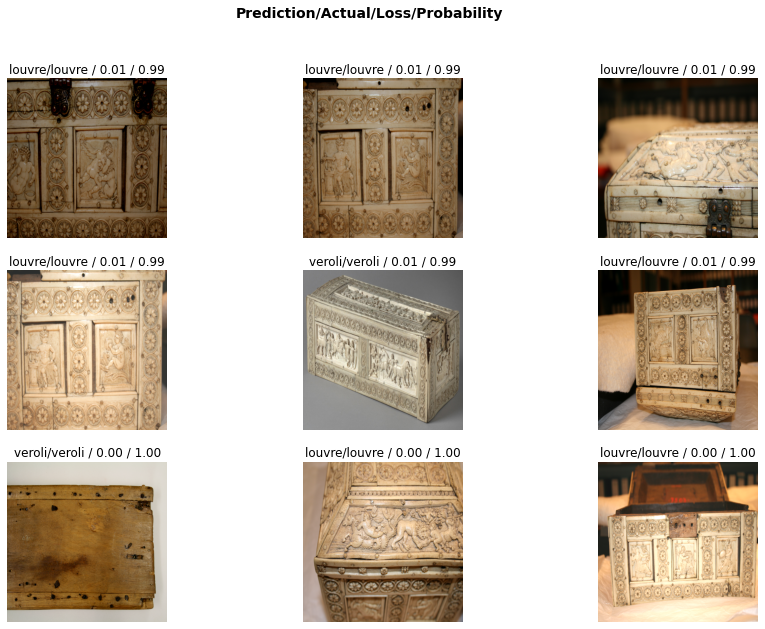

In [57]:
interp.plot_top_losses(9, figsize=(15,10))

In [58]:
learn.predict("Veroli Box/IMG_0450.jpg")

('veroli', tensor(2), tensor([1.4311e-08, 2.1357e-06, 1.0000e+00]))

In [60]:
learn.predict("Louvre Box/IMG_0086.JPG")

('louvre', tensor(1), tensor([3.2297e-06, 6.8470e-01, 3.1530e-01]))

In [61]:
learn.predict("Cluny/IMG_0282.JPG")

('veroli', tensor(2), tensor([2.2630e-06, 5.9557e-04, 9.9940e-01]))

In [62]:
learn.predict("Cluny/IMG_0263.JPG")

('veroli', tensor(2), tensor([2.1314e-06, 1.3208e-04, 9.9987e-01]))